In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
data = pd.read_csv('people_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]

In [5]:
data.head(5)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive__difference,Protein_negative_difference,Calories_positive__difference,Calories_negative_difference,Sodium_positive__difference,Sodium_negative_difference,...,Sugar_avg,Fat_max,Fat_min,Fat_avg,Carbs_max,Carbs_min,Carbs_avg,Fiber_max,Fiber_min,Fiber_avg
0,255,173,1.473988,443.271676,45,128,57,116,104,69,...,81.606936,196,0,77.734104,464,0,184.537572,0,0,0.000000
1,251,60,4.183333,190.550000,59,1,36,24,49,11,...,76.216667,134,1,42.283333,339,11,181.200000,0,0,0.000000
2,38,7,5.428571,718.571429,5,2,3,4,6,1,...,0.000000,72,0,38.142857,174,0,115.857143,45,0,17.142857
3,157,27,5.814815,72.481481,25,2,25,2,22,5,...,0.000000,91,3,37.074074,197,0,99.333333,0,0,0.000000
4,245,179,1.368715,1549.659218,105,74,134,45,121,58,...,121.268156,196,11,77.195531,0,0,0.000000,54,15,35.223464


In [6]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive__difference,Protein_negative_difference,Calories_positive__difference,Calories_negative_difference,Sodium_positive__difference,Sodium_negative_difference,...,Sugar_avg,Fat_max,Fat_min,Fat_avg,Carbs_max,Carbs_min,Carbs_avg,Fiber_max,Fiber_min,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,286.681993,59.335691,5.202374,172.582329,47.436742,11.898949,46.259499,13.076192,26.159964,33.175728,...,31.299723,132.784155,8.432094,46.689784,299.265360,32.303355,132.645318,15.963925,1.084074,6.102356
std,298.370319,54.571850,2.287778,3443.970487,46.110159,20.457755,43.795030,21.209041,35.818240,43.959710,...,98.285936,1380.641371,13.784006,29.029198,2205.705269,474.817861,476.762875,88.644542,30.269989,31.467639
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,1.000000,11.000000,1.000000,0.000000,3.000000,...,0.000000,70.000000,0.000000,32.508222,184.000000,1.000000,90.000000,0.000000,0.000000,0.000000
50%,190.500000,42.000000,4.926972,80.617819,32.000000,4.000000,32.000000,4.000000,10.000000,14.000000,...,29.154014,99.000000,3.000000,44.731238,251.000000,15.000000,127.341061,0.000000,0.000000,0.000000
75%,410.000000,92.000000,6.359022,134.026817,74.000000,14.000000,70.000000,16.000000,40.000000,45.000000,...,49.166667,135.000000,11.000000,58.086413,323.000000,37.000000,162.077197,28.000000,0.000000,11.501404
max,2938.000000,187.000000,30.000000,342000.000000,180.000000,182.000000,186.000000,167.000000,179.000000,187.000000,...,9000.000000,132088.000000,231.000000,1605.552941,210865.000000,47000.000000,47000.000000,7207.000000,3000.000000,3000.000000


In [7]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [9]:
hopkins(data)

0.9996402907995965

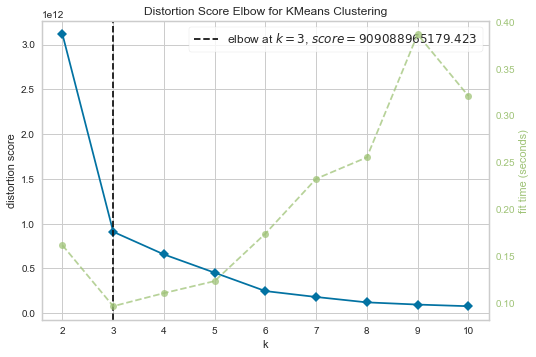

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(data)
visualizer.show()

In [20]:
km = KMeans(n_clusters = 3)
y = km.fit_predict(data)

clusters = [[] for _ in range(10)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

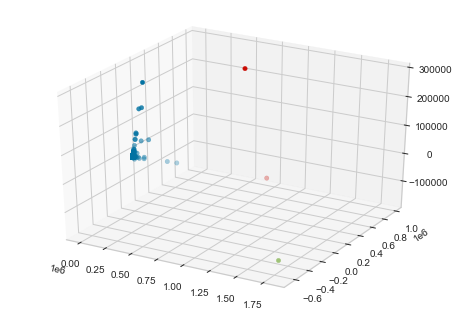

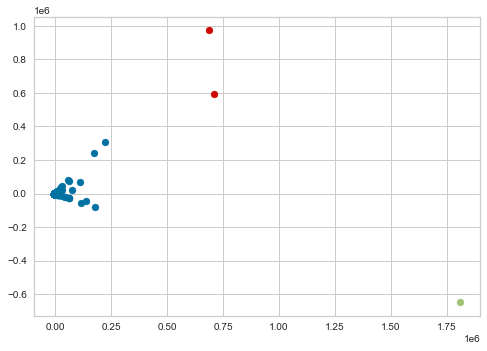

In [21]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 2)